In [1]:
import pandas as pd
import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

## erste schritt
Fasse die Produktionsdaten nach Produkttyp und Monat/Jahr zusammen. Ab jetzt arbeitest du nur noch in dieser neu erstellen Tabelle weiter. (Tipp: Es gibt 10 Produkttypen und Daten über 36 Monate, die Tabelle sollte zum Schluss also 360 Zeilen haben)

In [3]:
data=pd.read_excel("Daten Praxisaufgabe.xlsx")


In [4]:

data["Monat"]=data["Produktionsdatum"].dt.month
data["year"]=data["Produktionsdatum"].dt.year
data.head()

,Produktionsdatum,Produkttyp,Produktname,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,FabrikNr,Monat,year
0,2021-09-18,10,CheeseStation,27,675,297,378,0.97,1,9,2021
1,2020-05-01,3,Virtual Reality Nose Hair Trimmer,649,14927,649,2596,0.51,1,5,2020
2,2021-11-15,1,Wi-Fi Smelly Socks Detector,230,5290,230,1150,0.69,1,11,2021
3,2021-08-04,7,Solar-Powered Rain Cloud,882,17640,882,6174,0.88,1,8,2021
4,2021-01-08,6,Electric Toothbrush Karaoke Machine,205,3485,410,1025,0.07,1,1,2021


In [5]:
data_neu=data.groupby(['year','Monat','Produkttyp'], as_index=False).sum()
data_neu["Zielgewinnspanne"]=data["Zielgewinnspanne"]
firtig_data=data_neu[["year","Monat","Produkttyp","Produzierte Einheiten","Arbeitskosten","Materialkosten","Sonstige Kosten","Zielgewinnspanne"]]
display(firtig_data)


C:\Users\49163\AppData\Local\Temp\ipykernel_17588\3068666339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_neu=data.groupby(['year','Monat','Produkttyp'], as_index=False).sum()


,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne
0,2020,1,1,3234,53859,4745,19334,0.97
1,2020,1,2,5843,95192,9041,40061,0.51
2,2020,1,3,2439,38983,3381,15022,0.69
3,2020,1,4,3538,49649,5118,18458,0.88
4,2020,1,5,3389,50403,5233,20024,0.07
...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51
356,2022,12,7,3101,44913,4936,22890,0.46
357,2022,12,8,547,12015,8639,6591,0.91
358,2022,12,9,194,4272,2696,2173,0.07


## zweiter schritt
2.	Füge der Tabelle eine Spalte hinzu, die die Gesamtkosten für jede Produktart und jeden Monat berechnet, indem du die Arbeitskosten, Materialkosten und Sonstige Kosten addierst.

In [6]:
firtig_data["Gesamtkosten"]=firtig_data["Arbeitskosten"]+firtig_data["Materialkosten"]+firtig_data["Sonstige Kosten"]
display(firtig_data)

,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,Gesamtkosten
0,2020,1,1,3234,53859,4745,19334,0.97,77938
1,2020,1,2,5843,95192,9041,40061,0.51,144294
2,2020,1,3,2439,38983,3381,15022,0.69,57386
3,2020,1,4,3538,49649,5118,18458,0.88,73225
4,2020,1,5,3389,50403,5233,20024,0.07,75660
...,...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51,55722
356,2022,12,7,3101,44913,4936,22890,0.46,72739
357,2022,12,8,547,12015,8639,6591,0.91,27245
358,2022,12,9,194,4272,2696,2173,0.07,9141


## dritt schritt
3.	Füge der Tabelle eine Spalte hinzu, die die durchschnittlichen Kosten pro Einheit für jeden Produkttyp und Monat berechnet, indem die Gesamtkosten durch die produzierten Einheiten geteilt werden.

In [6]:
firtig_data["durchnittlich_kosten"]=firtig_data["Gesamtkosten"]/firtig_data["Produzierte Einheiten"]
display(firtig_data)

,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,Gesamtkosten,durchnittlich_kosten
0,2020,1,1,3234,53859,4745,19334,0.97,77938,24.099567
1,2020,1,2,5843,95192,9041,40061,0.51,144294,24.695191
2,2020,1,3,2439,38983,3381,15022,0.69,57386,23.528495
3,2020,1,4,3538,49649,5118,18458,0.88,73225,20.696721
4,2020,1,5,3389,50403,5233,20024,0.07,75660,22.325170
...,...,...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51,55722,24.311518
356,2022,12,7,3101,44913,4936,22890,0.46,72739,23.456627
357,2022,12,8,547,12015,8639,6591,0.91,27245,49.808044
358,2022,12,9,194,4272,2696,2173,0.07,9141,47.118557


## vierte schritt
4.	Füge der Tabelle eine Spalte hinzu, die den erforderlichen Verkaufspreis für jeden Produkttyp und jeden Monat berechnet, indem die Gesamtkosten durch (1 - die Zielgewinnspanne) dividiert werden.


In [7]:
firtig_data["verkaufspreis"]=(firtig_data["Gesamtkosten"]/(1-firtig_data["Zielgewinnspanne"]))
display(firtig_data)

,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,Gesamtkosten,verkaufspreis
0,2020,1,1,3234,53859,4745,19334,0.97,77938,2.597933e+06
1,2020,1,2,5843,95192,9041,40061,0.51,144294,2.944776e+05
2,2020,1,3,2439,38983,3381,15022,0.69,57386,1.851161e+05
3,2020,1,4,3538,49649,5118,18458,0.88,73225,6.102083e+05
4,2020,1,5,3389,50403,5233,20024,0.07,75660,8.135484e+04
...,...,...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51,55722,1.137184e+05
356,2022,12,7,3101,44913,4936,22890,0.46,72739,1.347019e+05
357,2022,12,8,547,12015,8639,6591,0.91,27245,3.027222e+05
358,2022,12,9,194,4272,2696,2173,0.07,9141,9.829032e+03


## fünfte schritt
5.	Berechne nun folgende Metriken: 
•	Produzierte Einheiten insgesamt


In [8]:
firtig_data["Kosten pro einheit"] = firtig_data["Gesamtkosten"]/firtig_data["Produzierte Einheiten"]
firtig_data

,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,Gesamtkosten,verkaufspreis,Kosten pro einheit
0,2020,1,1,3234,53859,4745,19334,0.97,77938,2.597933e+06,24.099567
1,2020,1,2,5843,95192,9041,40061,0.51,144294,2.944776e+05,24.695191
2,2020,1,3,2439,38983,3381,15022,0.69,57386,1.851161e+05,23.528495
3,2020,1,4,3538,49649,5118,18458,0.88,73225,6.102083e+05,20.696721
4,2020,1,5,3389,50403,5233,20024,0.07,75660,8.135484e+04,22.325170
...,...,...,...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51,55722,1.137184e+05,24.311518
356,2022,12,7,3101,44913,4936,22890,0.46,72739,1.347019e+05,23.456627
357,2022,12,8,547,12015,8639,6591,0.91,27245,3.027222e+05,49.808044
358,2022,12,9,194,4272,2696,2173,0.07,9141,9.829032e+03,47.118557


In [9]:
Produzierte_insgesamt=firtig_data["Produzierte Einheiten"].sum()
Produzierte_insgesamt

995462

## •	Gesamtkosten

In [10]:
Gesamtkosten=firtig_data["Gesamtkosten"].sum()
Gesamtkosten

25059194

•	Durchschnittliche Kosten pro Einheit


In [11]:
Durchschnittliche_Kosten=firtig_data["Produzierte Einheiten"].mean()
Durchschnittliche_Kosten

2765.1722222222224

•	Erforderlicher Verkaufspreis
Erforderlicher_Verkaufspreis=firtig_dat["verkaufspreis"]

•Bruttogewinnspanne, berechnet als die Differenz zwischen dem Erforderlichen Verkaufspreis und den durchschnittlichen Kosten pro Einheit, geteilt durch den Erforderlichen Verkaufspreis

In [12]:
firtig_data["Bruttogewinnspanne"]=firtig_data["verkaufspreis"]-firtig_data["Kosten pro einheit"]/firtig_data["verkaufspreis"]
firtig_data


,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,Gesamtkosten,verkaufspreis,Kosten pro einheit,Bruttogewinnspanne
0,2020,1,1,3234,53859,4745,19334,0.97,77938,2.597933e+06,24.099567,2.597933e+06
1,2020,1,2,5843,95192,9041,40061,0.51,144294,2.944776e+05,24.695191,2.944776e+05
2,2020,1,3,2439,38983,3381,15022,0.69,57386,1.851161e+05,23.528495,1.851161e+05
3,2020,1,4,3538,49649,5118,18458,0.88,73225,6.102083e+05,20.696721,6.102083e+05
4,2020,1,5,3389,50403,5233,20024,0.07,75660,8.135484e+04,22.325170,8.135484e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51,55722,1.137184e+05,24.311518,1.137184e+05
356,2022,12,7,3101,44913,4936,22890,0.46,72739,1.347019e+05,23.456627,1.347019e+05
357,2022,12,8,547,12015,8639,6591,0.91,27245,3.027222e+05,49.808044,3.027222e+05
358,2022,12,9,194,4272,2696,2173,0.07,9141,9.829032e+03,47.118557,9.829027e+03


•	Gesamtbruttogewinn, berechnet als Bruttogewinnspanne multipliziert mit dem Gesamterlös (d.h. Erforderlicher Verkaufspreis multipliziert mit der Anzahl der produzierten Einheiten)

In [13]:
firtig_data["Gesamtbruttogewinn"]=firtig_data["Bruttogewinnspanne"]*(firtig_data["verkaufspreis"]*firtig_data["Kosten pro einheit"])
firtig_data

,year,Monat,Produkttyp,Produzierte Einheiten,Arbeitskosten,Materialkosten,Sonstige Kosten,Zielgewinnspanne,Gesamtkosten,verkaufspreis,Kosten pro einheit,Bruttogewinnspanne,Gesamtbruttogewinn
0,2020,1,1,3234,53859,4745,19334,0.97,77938,2.597933e+06,24.099567,2.597933e+06,1.626542e+14
1,2020,1,2,5843,95192,9041,40061,0.51,144294,2.944776e+05,24.695191,2.944776e+05,2.141494e+12
2,2020,1,3,2439,38983,3381,15022,0.69,57386,1.851161e+05,23.528495,1.851161e+05,8.062740e+11
3,2020,1,4,3538,49649,5118,18458,0.88,73225,6.102083e+05,20.696721,6.102083e+05,7.706511e+12
4,2020,1,5,3389,50403,5233,20024,0.07,75660,8.135484e+04,22.325170,8.135484e+04,1.477616e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022,12,6,2292,41071,3701,10950,0.51,55722,1.137184e+05,24.311518,1.137184e+05,3.143933e+11
356,2022,12,7,3101,44913,4936,22890,0.46,72739,1.347019e+05,23.456627,1.347019e+05,4.256109e+11
357,2022,12,8,547,12015,8639,6591,0.91,27245,3.027222e+05,49.808044,3.027222e+05,4.564446e+12
358,2022,12,9,194,4272,2696,2173,0.07,9141,9.829032e+03,47.118557,9.829027e+03,4.552116e+09


## Grafik erstellen

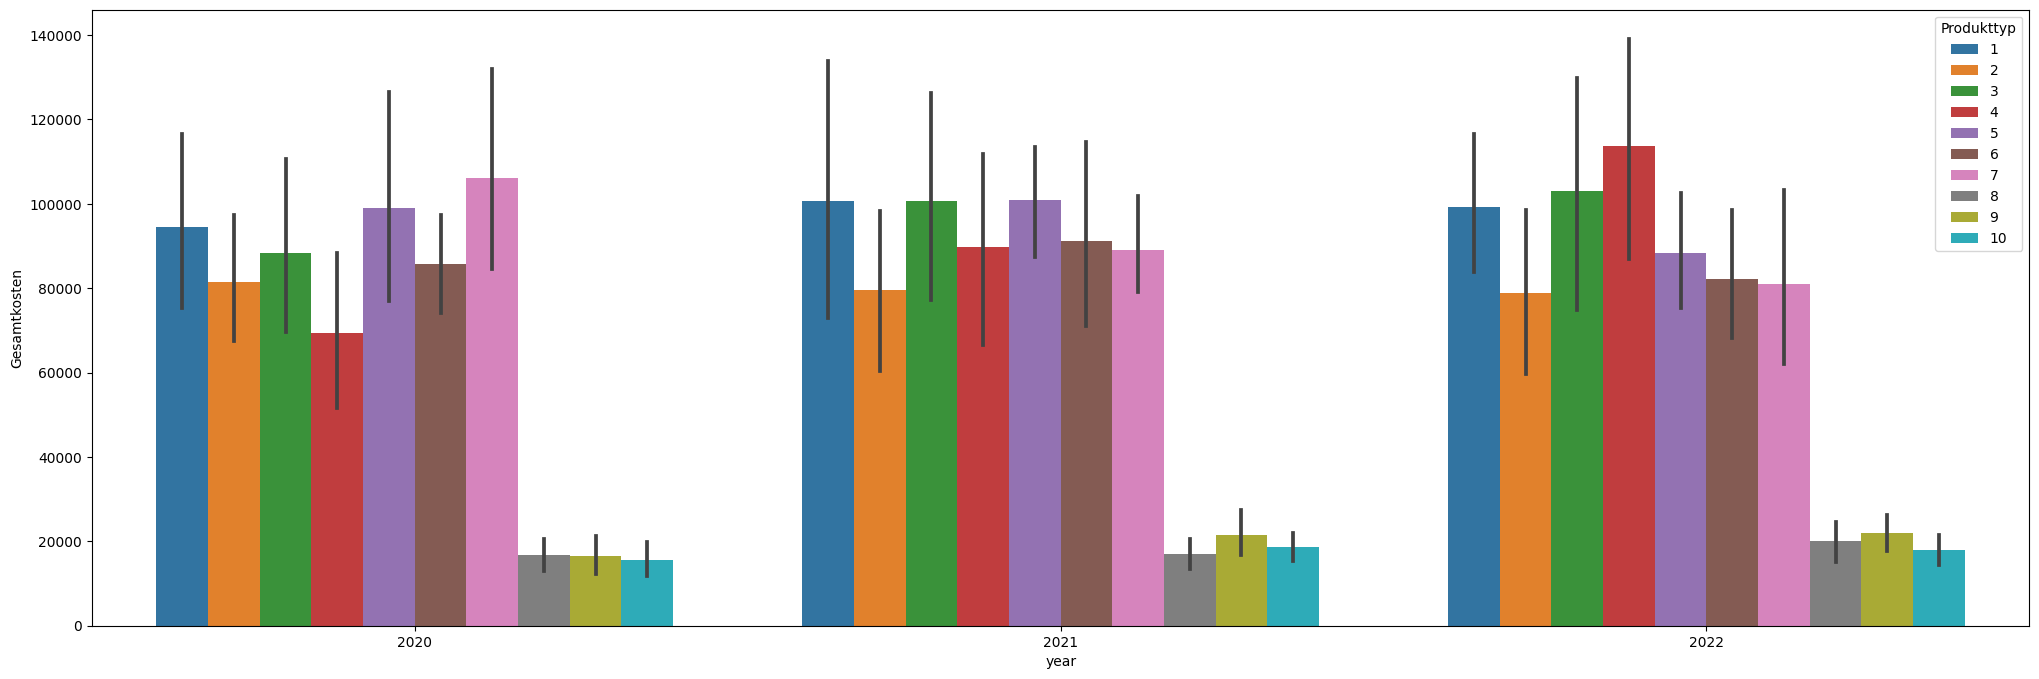

In [14]:
# welche produkt in welcher Jahr kostet viel oder weniger
plt.figure(figsize=(25,8))
kosten=sns.barplot(data=firtig_data, x="year", y="Gesamtkosten", hue="Produkttyp")

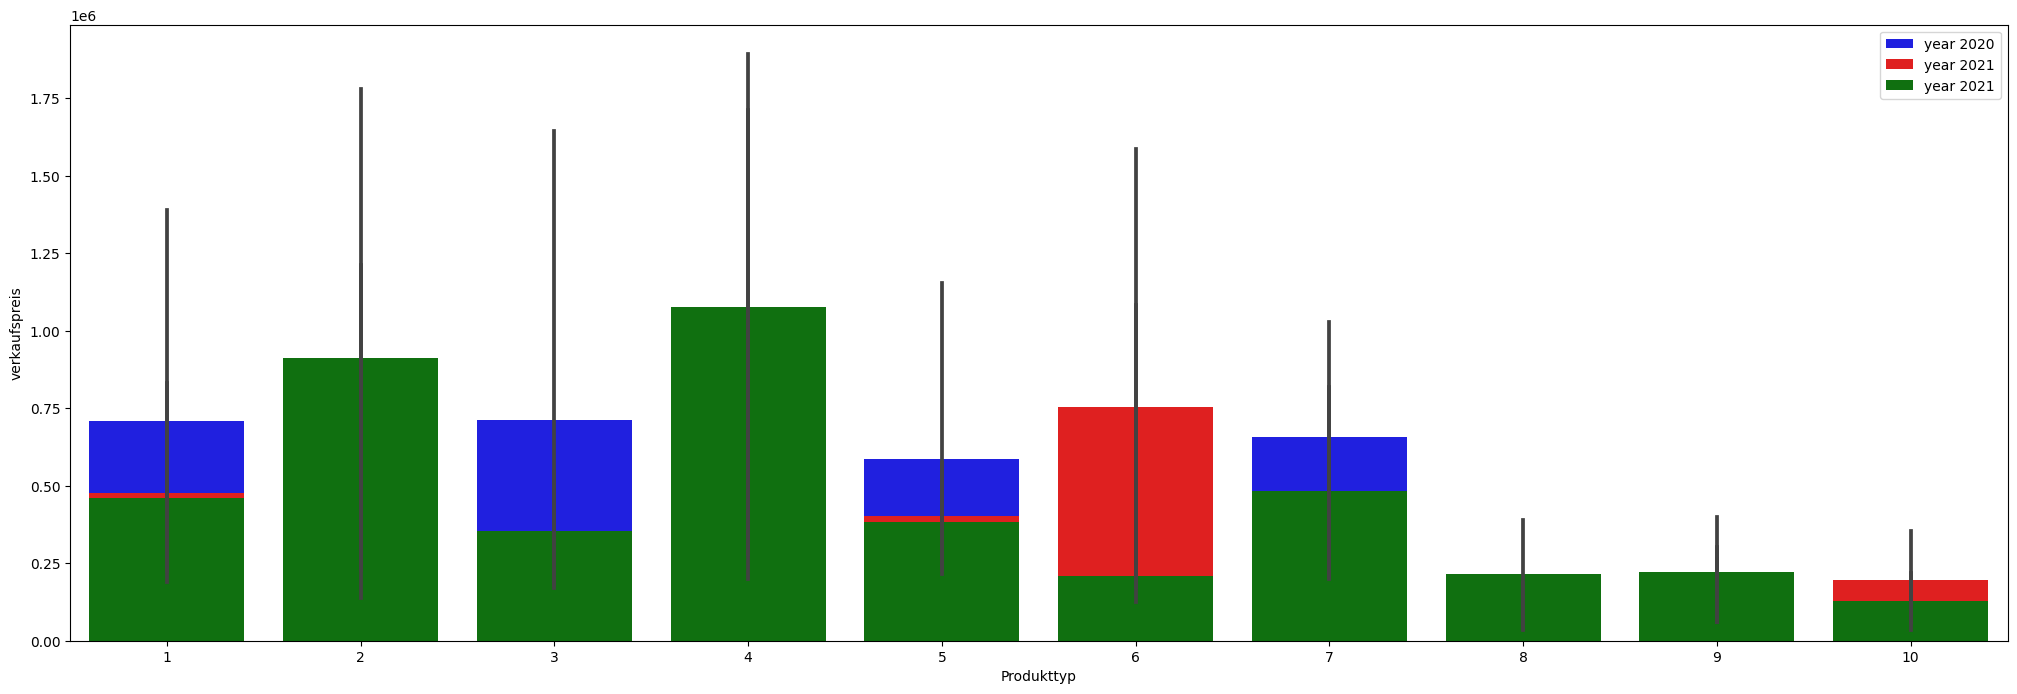

In [39]:
plt.figure(figsize=(25,8))
#sns.barplot(data=vesicherung,x="Produkttyp",y="total")
sns.barplot(data=firtig_data[firtig_data['year'] == 2020], x="Produkttyp", y="verkaufspreis", label="year 2020",color='blue')
sns.barplot(data=firtig_data[firtig_data['year'] == 2021], x="Produkttyp", y="verkaufspreis", label="year 2021", color='red')
sns.barplot(data=firtig_data[firtig_data['year'] == 2022], x="Produkttyp", y="verkaufspreis", label="year 2021", color='green')
plt.legend()

In [17]:
tabel1=firtig_data[firtig_data['year'] == 2020]
tabel2=firtig_data[firtig_data['year'] == 2021]
tabel3=firtig_data[firtig_data['year'] == 2022]


In [37]:
x1= tabel1["Zielgewinnspanne"]
x2= tabel2["Zielgewinnspanne"]
x3= tabel3["Zielgewinnspanne"]
hist_data = [x1, x2, x3]
group_labels = ['zielgewinn2020', 'zielgewinn2021', 'zielgewinn2022']
colors = ['blue', 'red', 'green']

#Plot erstellen
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.2, show_rug=True)

#Title hinzufügen
#fig.update_layout(title_text='Hist and Curve Plot')
fig.show()


<AxesSubplot: xlabel='Produkttyp', ylabel='verkaufspreis'>

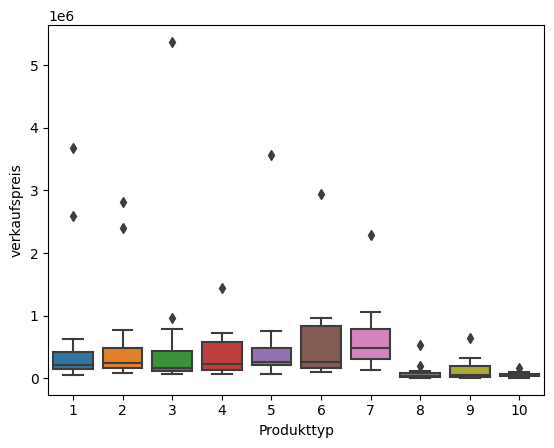

In [20]:
sns.boxplot(x="Produkttyp",y="verkaufspreis",data=tabel1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


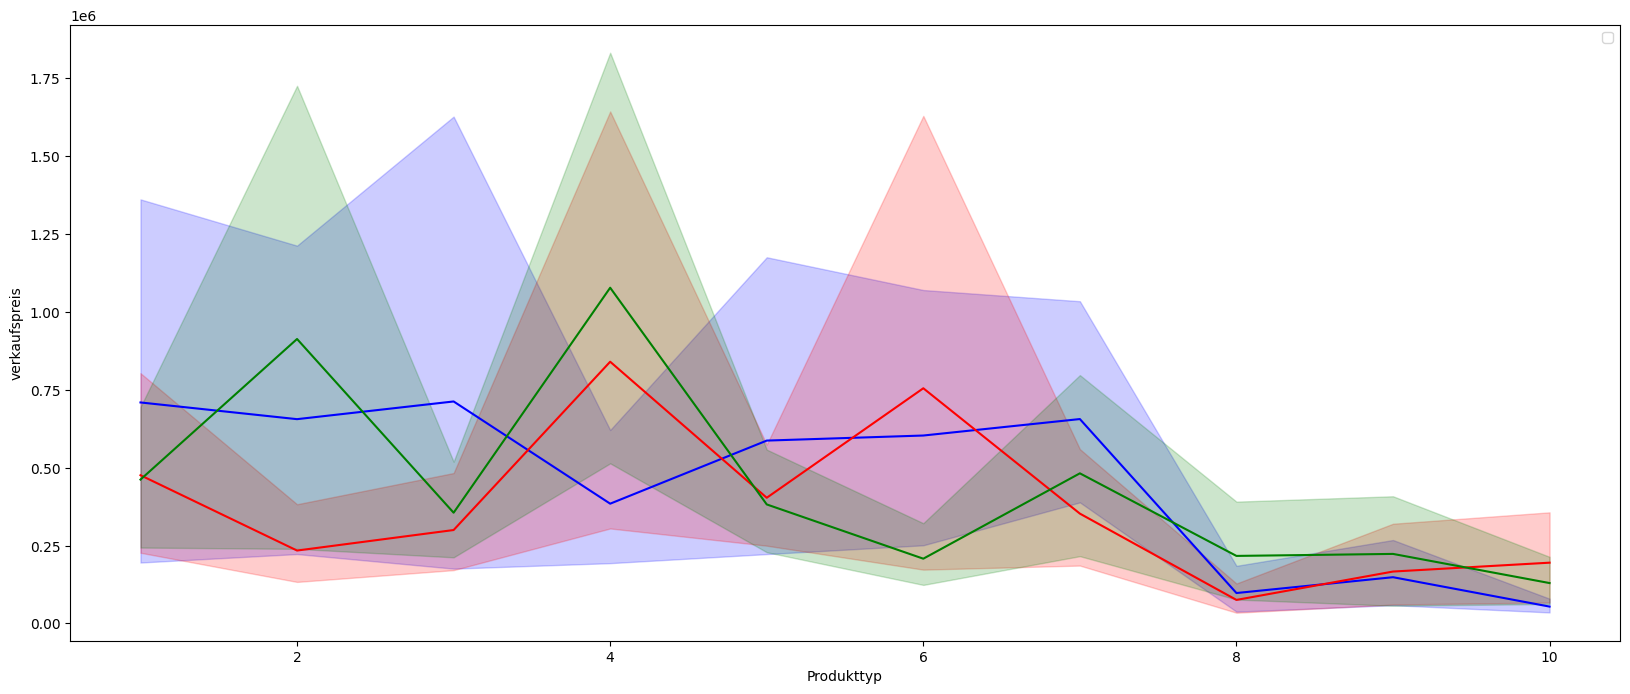

In [43]:
plt.figure(figsize=(20,8))
fig=sns.lineplot(x="Produkttyp",y="verkaufspreis",data=tabel1,color="blue")
sns.lineplot(x="Produkttyp",y="verkaufspreis",data=tabel2,color="red")
sns.lineplot(x="Produkttyp",y="verkaufspreis",data=tabel3,color="green")
plt.legend()

<AxesSubplot: xlabel='Produkttyp', ylabel='Gesamtbruttogewinn'>

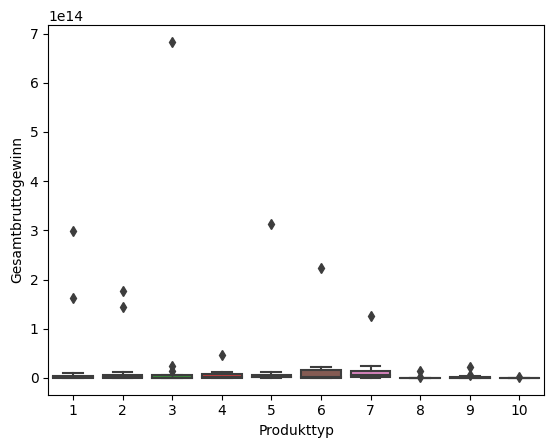

In [72]:

sns.boxplot(x="Produkttyp",y="Gesamtbruttogewinn",data=tabel1)

C:\Users\49163\AppData\Local\Temp\ipykernel_17588\3377914176.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



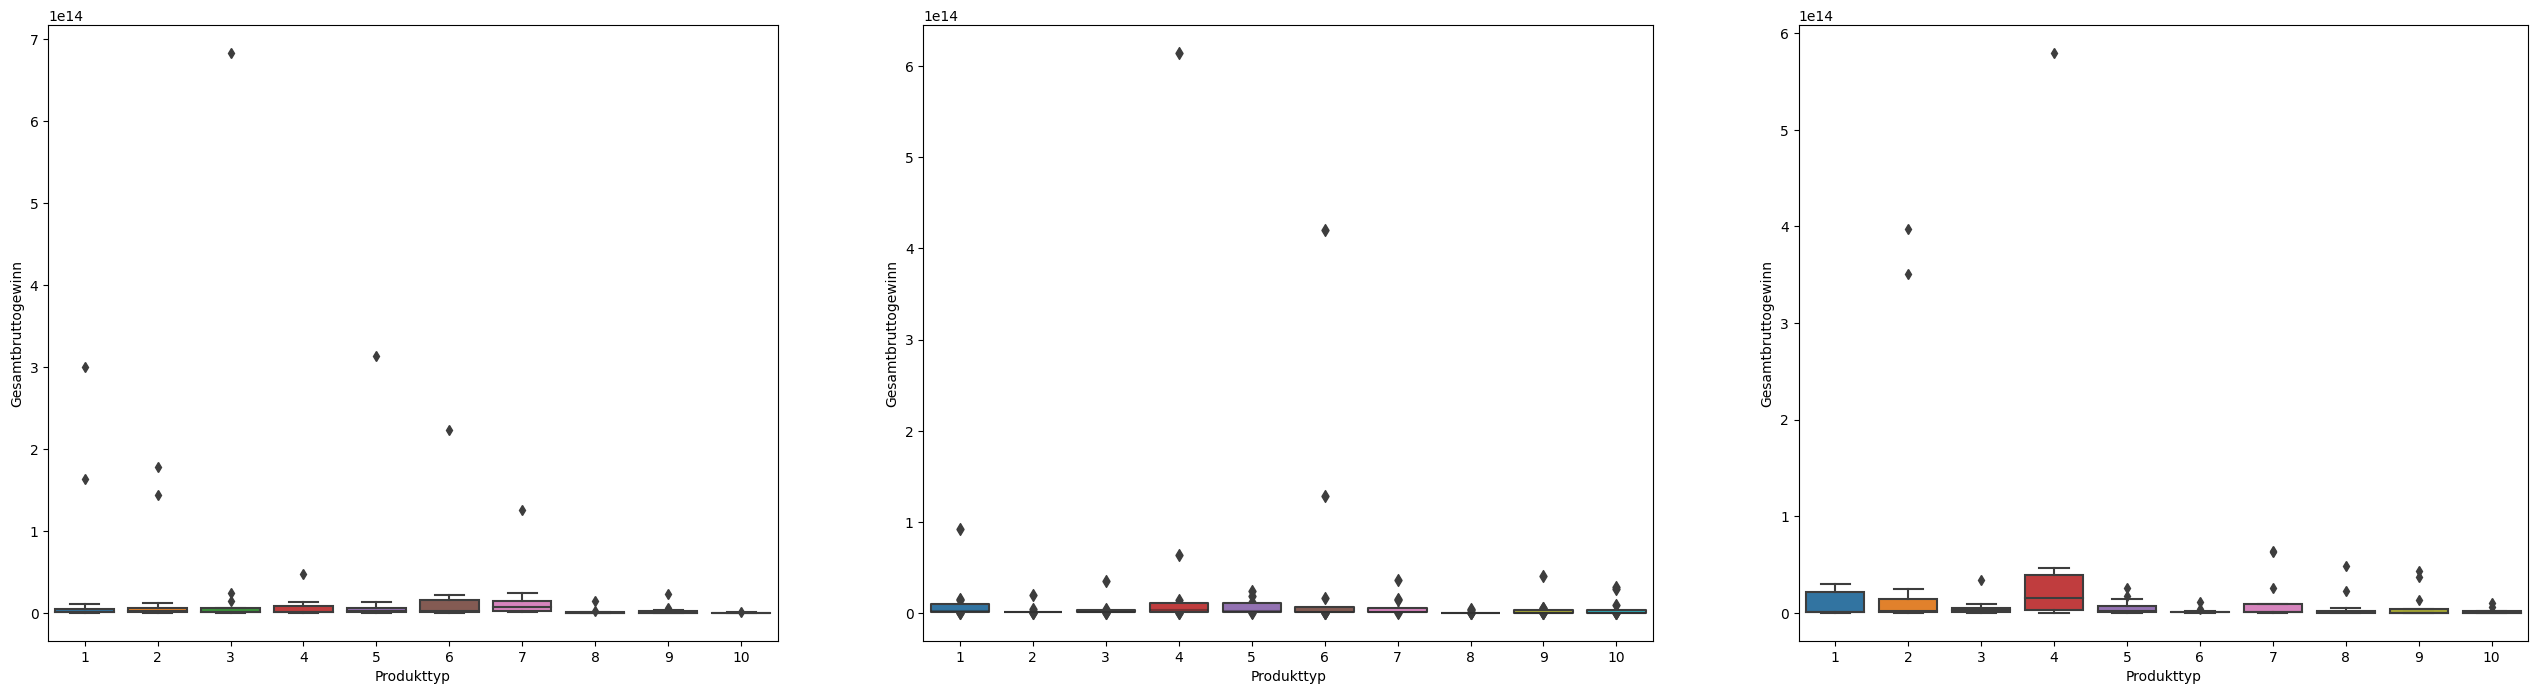

In [75]:

fig,ax=plt.subplots(1,3,figsize=(32,8))

sns.boxplot(x="Produkttyp",y="Gesamtbruttogewinn",data=tabel1,ax=ax[0])
#ax[0].set_title("boxplot")
#ax[0].set_xlabel("Produkttyp")
#ax[0].set_ylabel("Gesamtbruttogewinn")
#ax[0].set_ylim([0,81])

sns.boxenplot(x="Produkttyp",y="Gesamtbruttogewinn",data=tabel2,ax=ax[1])
#ax[1].set_title("boxenplot")
#ax[1].set_xlabel("Produkttyp")
#ax[1].set_ylabel("Gesamtbruttogewinn")
#ax[1].set_ylim([0,81])

sns.boxplot(x="Produkttyp",y="Gesamtbruttogewinn",data=tabel3,ax=ax[2])
#ax[2].set_title("boxplot")
#ax[2].set_xlabel("Produkttyp")
#ax[2].set_ylabel("Gesamtbruttogewinn")
#ax[2].set_ylim([0,81])
fig.show()

(0.0, 81.0)

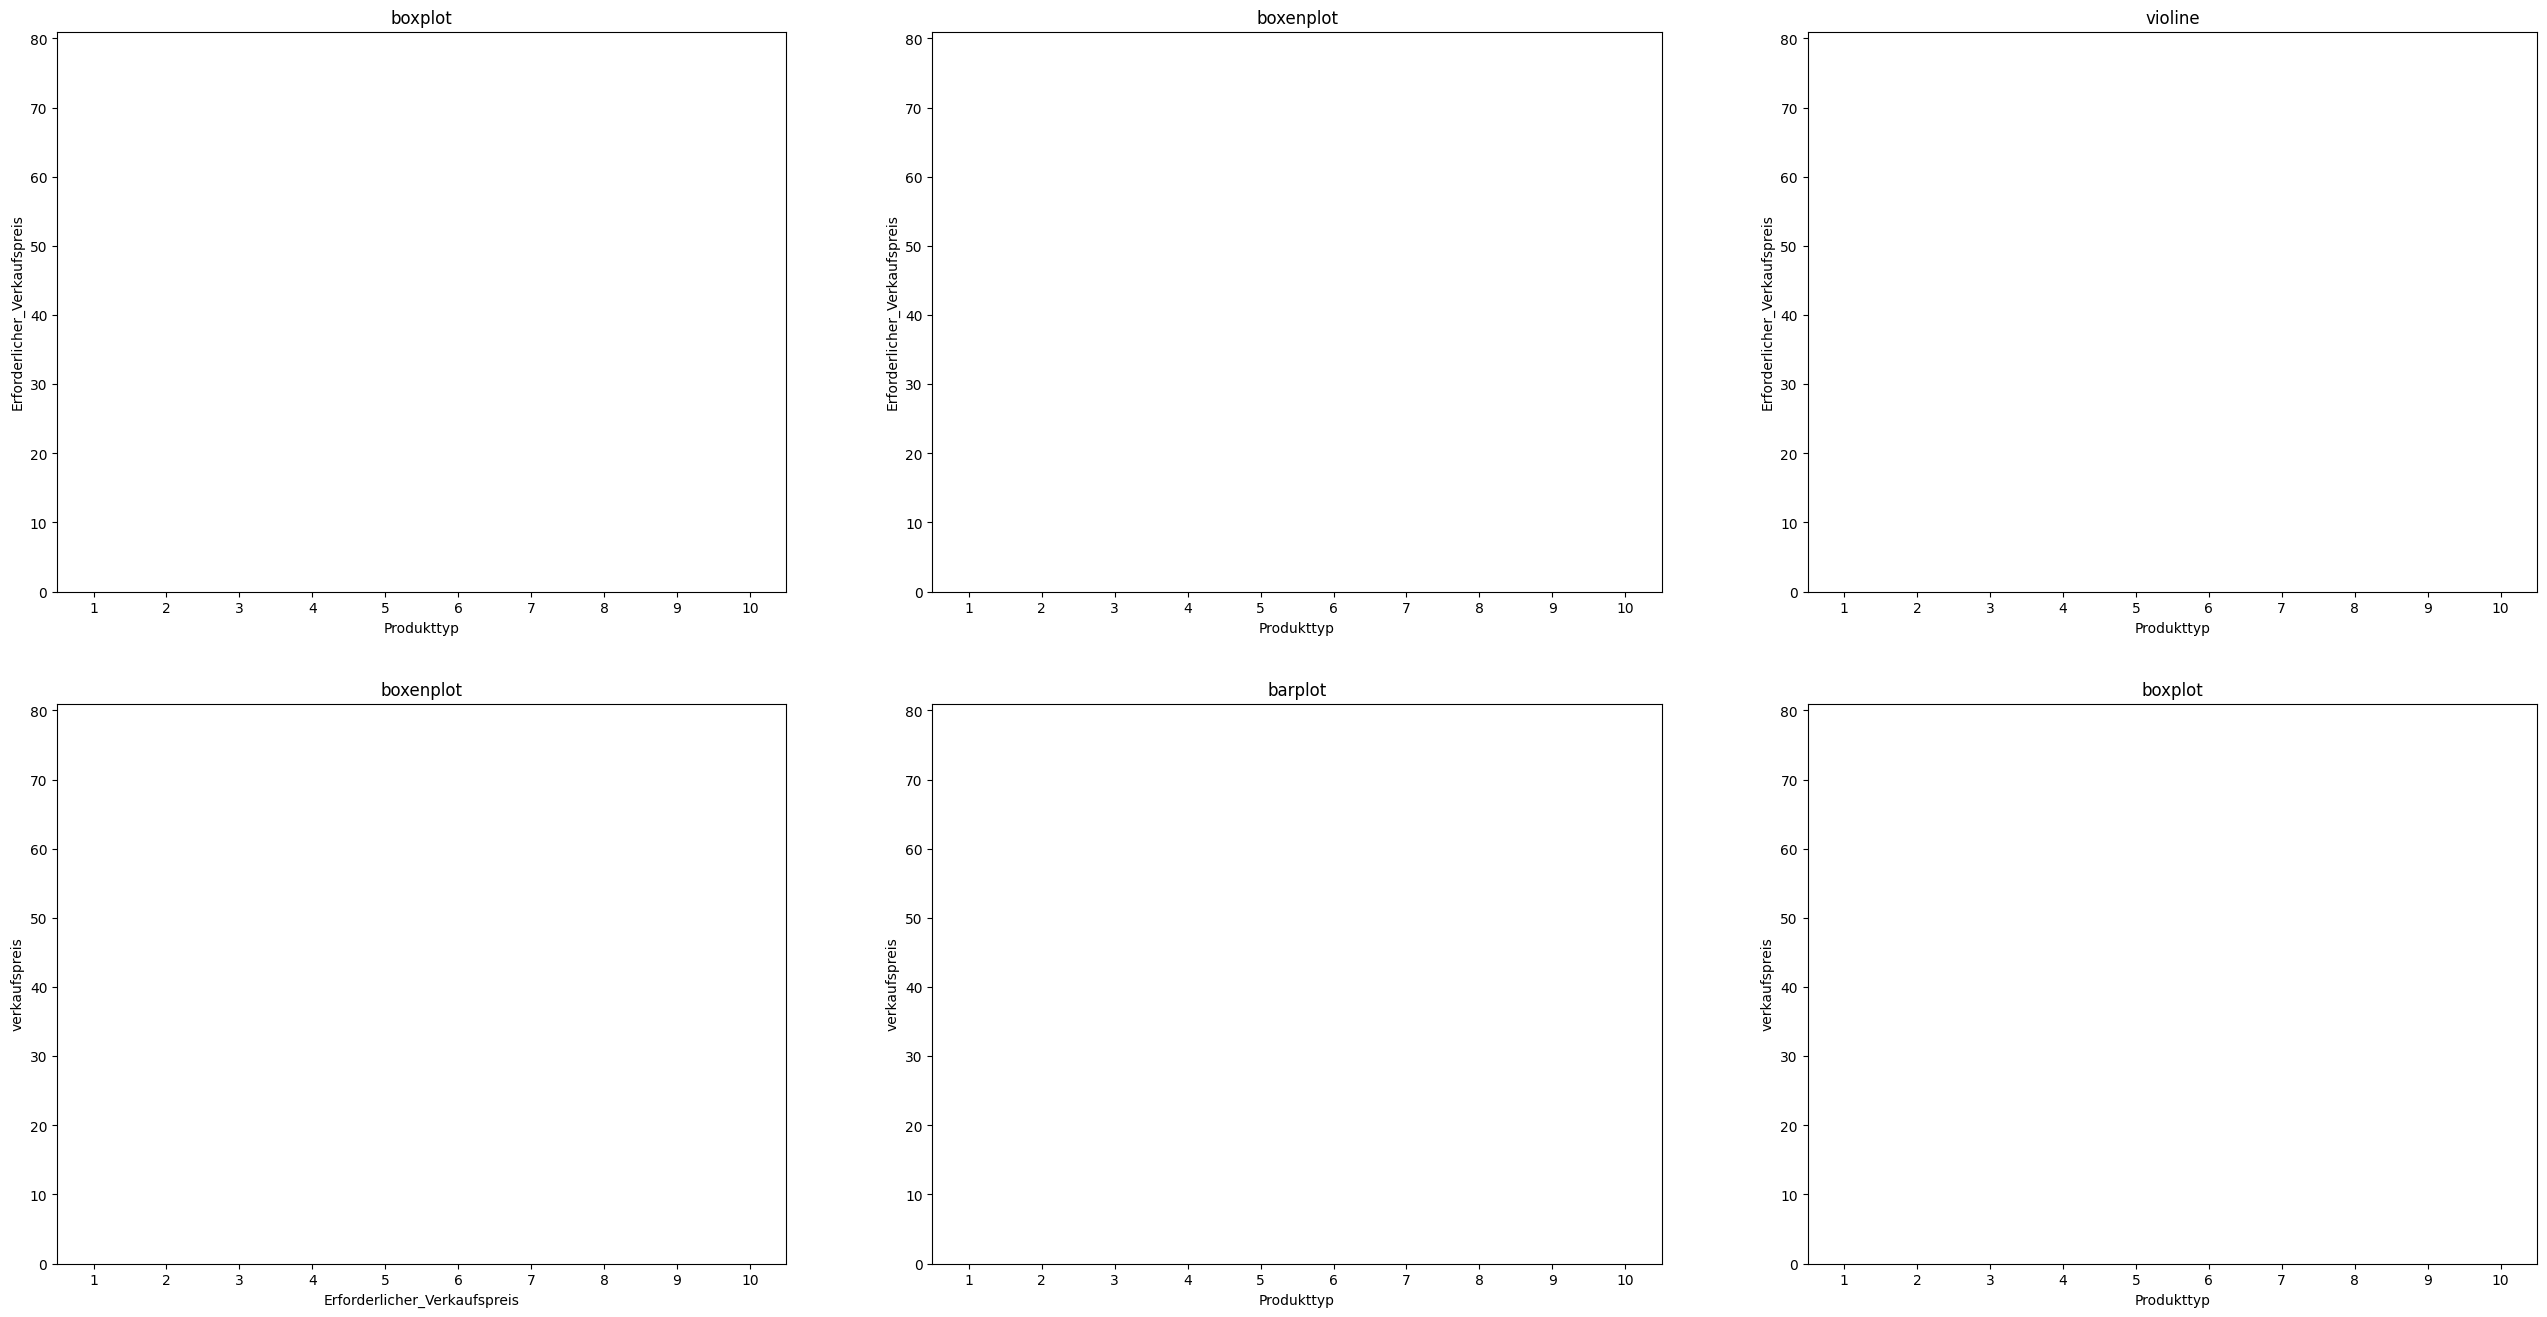

In [43]:

fig,ax=plt.subplots(2,3,figsize=(32,16))

sns.boxplot(x="Produkttyp",y="Erforderlicher_Verkaufspreis",data=tabel1,ax=ax[0][0])
ax[0][0].set_title("boxplot")
ax[0][0].set_xlabel("Produkttyp")
ax[0][0].set_ylabel("Erforderlicher_Verkaufspreis")
ax[0][0].set_ylim([0,81])

sns.boxenplot(x="Produkttyp",y="Erforderlicher_Verkaufspreis",data=tabel2,ax=ax[0][1])
ax[0][1].set_title("boxenplot")
ax[0][1].set_xlabel("Produkttyp")
ax[0][1].set_ylabel("Erforderlicher_Verkaufspreis")
ax[0][1].set_ylim([0,81])

sns.boxplot(x="Produkttyp",y="Erforderlicher_Verkaufspreis",data=tabel3,ax=ax[0][2])
ax[0][2].set_title("boxplot")
ax[0][2].set_xlabel("Produkttyp")
ax[0][2].set_ylabel("Erforderlicher_Verkaufspreis")
ax[0][2].set_ylim([0,81])


sns.boxplot(x="Produkttyp",y="verkaufspreis",data=tabel1,ax=ax[1][0])
ax[1][0].set_title("boxenplot")
ax[1][0].set_xlabel("Erforderlicher_Verkaufspreis")
ax[1][0].set_ylabel("verkaufspreis")
ax[1][0].set_ylim([0,81])

sns.boxplot(x="Produkttyp",y="verkaufspreis",data=tabel2,ax=ax[1][1])
ax[1][1].set_title("barplot")
ax[1][1].set_xlabel("Produkttyp")
ax[1][1].set_ylabel("verkaufspreis")
ax[1][1].set_ylim([0,81])

sns.boxplot(x="Produkttyp",y="verkaufspreis",data=tabel3,ax=ax[1][2])
ax[1][2].set_title("boxplot")
ax[1][2].set_xlabel("Produkttyp")
ax[1][2].set_ylabel("verkaufspreis")
ax[1][2].set_ylim([0,81])

In [24]:
import nbconvert 
from fpdf import FPDF 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lorem

In [ ]:
plt.figure(figsize=(25,8))
kosten=sns.barplot(data=firtig_data, x="year", y="Gesamtkosten", hue="Produkttyp")
plt.savefig('./grafikbild1.png')
plt.close()

In [ ]:
# Erste Grafik Bild 
plt.figure(figsize=(25,8))
kosten=sns.barplot(data=firtig_data, x="year", y="Gesamtkosten", hue="Produkttyp")
plt.savefig('./grafikbild1.png')
plt.close()

In [44]:
# zweiter grafik bild
plt.figure(figsize=(25,8))
#sns.barplot(data=vesicherung,x="Produkttyp",y="total")
sns.barplot(data=firtig_data[firtig_data['year'] == 2020], x="Produkttyp", y="verkaufspreis", label="year 2020",color='blue')
sns.barplot(data=firtig_data[firtig_data['year'] == 2021], x="Produkttyp", y="verkaufspreis", label="year 2021", color='red')
sns.barplot(data=firtig_data[firtig_data['year'] == 2022], x="Produkttyp", y="verkaufspreis", label="year 2022", color='green')
plt.legend()
plt.savefig('./grafikbild3.png')
plt.close()

In [63]:
erstetxt="in diese Grafik die Xaxse ist die Jahre (2020,2021,2022) und die yaxse ist die gesamtkosten \nfür jeder product in jeder Jahr  und Jeder product Hat eine Farbe so in Jahr 2020 die product 7 \n kostet die viele und die günstige product ist product 10"
zweitertxt="in diese Grafik die xaxse ist die Jahren (2020,2021,2022)  und die yaxse ist die verkaufspreis\nfür Jeder product von die 10 Produkte ,2020 ist blau ,2021 rot und 2022 ist grün .kann Mann klar \n sehen in welcher Jahr welcher product teuerste als  verkauft  so in Jahr 2022 zum beispiel \n die product 4 war am teuersten "

In [68]:
pdf=FPDF()
pdf.add_page()
pdf.set_font("Arial", "IB", 20)
pdf.cell(w=0,h=20,txt="Tagsaufgaben 21.02.2023 \n ",ln=1,align="C")
#pdf.set_font(style="IB")

pdf.set_font("Arial","B",15)
pdf.cell(w=30,h=8,txt="Erste Grafik \n",ln=1)

pdf.set_font("Arial","U",15)
pdf.cell(w=30,h=8,txt="Erklerung \n",ln=1)

pdf.set_font("Arial","",10)
pdf.multi_cell(w=0,h=5,txt=erstetxt)
pdf.image('./grafikbild1.png', type="PNG",w=100,h=40)

pdf.set_font("Arial","B",15,)
pdf.cell(w=30,h=8,txt="zweiter Grafik \n",ln=1)

pdf.set_font("Arial","U",15)
pdf.cell(w=30,h=8,txt="Erklerung \n",ln=1)


pdf.set_font("Arial","",10)
pdf.multi_cell(w=0,h=5,txt=zweitertxt)
pdf.image('./grafikbild3.png', type="PNG",w=100,h=40)

pdf.set_font('Arial', 'I', 8)
pdf.cell(w=30, h=8, txt="Datum: ", ln=0,align="L")
pdf.cell(w=30, h=8, txt="21/02/2023", ln=1,align="L")
pdf.cell(w=30, h=8, txt="erstellt von: ", ln=0,align="L")
pdf.cell(w=30, h=8, txt="Ayin Abdullah", ln=1,align="L")

pdf.output(f'./Tagsaufgaben21.02.pdf', 'F')

''